# PPIs Horizontais
## Visão geral, não focada nos casos
Este programa:
* Lê os dados de PPI
    * CTH _(.HDF5)_
    * São Roque _(.mvol)_
    * UNICAMP __- sem dados para os casos de 2016-12-25, 2017-01-31 e 2017-03-14__ _(.HDF5)_
* Seleciona a refletividade corrigida (_corrected reflectivity_)
* Plota e salva figuras de algumas elevações
    * Para o do CTH:
        * [0] 1,0 grau 
        * [1] 1,6 graus 
        * [2] 2,4 graus 
        * [3] 3,2 graus 
    * Para o de São Roque:
        * [0] 0,5 graus
        * [1] 1,0 grau
        * [2] 2,0 graus
        * [3] 3,0 graus
    * Para o da UNICAMP: __COM PROBLEMAS__
        * [0]
        * [1]
        * [2]
        * [3]

## Carregando pacotes necessários

In [1]:
#-- RODAR SÓ UMA VEZ!
import matplotlib
matplotlib.use('Agg')

In [2]:
%matplotlib inline

import read_brazil_radar as rbr
import pyart
import matplotlib.pyplot as plt
import numpy as np

/home/camila/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



### Funções
#### Descrição delas em *funcoes_descricao*

In [3]:
def plota_ppi(arquivo, elevacao, lon_lims, lat_lims, lat_point1, lon_point1, lat_point2, lon_point2,
             variavel = 'corrected_reflectivity', var_min = 10, var_max = 70):
    
    display = pyart.graph.RadarMapDisplay(arquivo)
    fig = plt.figure(figsize = [12,9])
    display.plot_ppi_map(variavel, sweep = elevacao, shapefile = "shapefiles/sao_paulo", vmin = var_min, vmax = var_max, 
                         min_lat = lat_lims[0], max_lat = lat_lims[1], min_lon = lon_lims[0], max_lon = lon_lims[1], 
                         lat_lines = np.arange(lat_lims[0], lat_lims[1], .5), 
                         lon_lines = np.arange(lon_lims[0], lon_lims[1], .5))
    display.plot_point(lat=lat_point1, lon=lon_point1, symbol = 'k.', label_text='hailpad')
    display.plot_point(lat=lat_point2, lon=lon_point2, symbol = 'k.', label_text='hailpad')

<hr>

## Lendo os nomes dos arquivos .hdf5 e .mvol

#### CTH

In [4]:
files_cth_20161225 = open("dados_entrada/cth_level0_20161225", 'r')
files_cth_20161225 = files_cth_20161225.read().split('\n')

files_cth_20170131 = open("dados_entrada/cth_level0_20170131", 'r')
files_cth_20170131 = files_cth_20170131.read().split('\n')

files_cth_20170314 = open("dados_entrada/cth_level0_20170314", 'r')
files_cth_20170314 = files_cth_20170314.read().split('\n')

files_cth_20171115 = open("dados_entrada/cth_level0_20171115", 'r')
files_cth_20171115 = files_cth_20171115.read().split('\n')

files_cth_20171116 = open("dados_entrada/cth_level0_20171116", 'r')
files_cth_20171116 = files_cth_20171116.read().split('\n')

#### São Roque

In [5]:
files_sr_20161225 = open("dados_entrada/sr_level0_20161225", 'r')
files_sr_20161225 = files_sr_20161225.read().split('\n')

files_sr_20170131 = open("dados_entrada/sr_level0_20170131", 'r')
files_sr_20170131 = files_sr_20170131.read().split('\n')

files_sr_20170314 = open("dados_entrada/sr_level0_20170314", 'r')
files_sr_20170314 = files_sr_20170314.read().split('\n')

files_sr_20171115 = open("dados_entrada/sr_level0_20171115", 'r')
files_sr_20171115 = files_sr_20171115.read().split('\n')

files_sr_20171116 = open("dados_entrada/sr_level0_20171116", 'r')
files_sr_20171116 = files_sr_20171116.read().split('\n')

#### UNICAMP

In [6]:
files_cmp_20171115 = open("dados_entrada/cmp_level0_20171115", 'r')
files_cmp_20171115 = files_cmp_20171115.read().split('\n')

files_cmp_20171116 = open("dados_entrada/cmp_level0_20171116", 'r')
files_cmp_20171116 = files_cmp_20171116.read().split('\n')

<hr>

## Plotando as figuras separadamente e salvando em "figuras/ppis/"

#### CTH

In [7]:
for f in files_cth_20161225:
    name = f[50:64]
    
    try:
        #-- Lendo o arquivo
        cth = rbr.read_rainbow_hdf5(f)
        
        #--- Limites do gráfico
        lon_lims, lat_lims = [-48, -45], [-24.5, -22]
   
        #-- Plotando cada nível
        for n in range(0, 4):     
            plota_ppi(cth, n, lon_lims, lat_lims, -22.83092, -47.08152, -22.83092, -47.08152) #- Gerando o gráfico
            plt.savefig("figuras/ppis/cth/cth_elev" + str(n) + "_" + name + ".png", bbox_inches='tight') #- Salvando
            plt.close()
            
    except ValueError:
        pass

/home/camila/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/camila/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/camila/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/camila/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [7]:
for f in files_cth_20170131:
    name = f[50:64]
    
    try:
        #-- Lendo o arquivo
        cth = rbr.read_rainbow_hdf5(f)
        
        #--- Limites do gráfico
        lon_lims, lat_lims = [-48, -45], [-24.5, -22]
   
        #-- Plotando cada nível
        for n in range(0, 4):     
            plota_ppi(cth, n, lon_lims, lat_lims, -22.90958, -47.06725, -22.90958, -47.06725) #- Gerando o gráfico
            plt.savefig("figuras/ppis/cth/cth_elev" + str(n) + "_" + name + ".png", bbox_inches='tight') #- Salvando
            plt.close()
            
    except (ValueError, KeyError):
        pass

/home/camila/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/camila/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [15]:
for f in files_cth_20170314:
    name = f[50:64]

    try:
        #-- Lendo o arquivo
        cth = rbr.read_rainbow_hdf5(f)
        
        #--- Limites do gráfico
        lon_lims, lat_lims = [-48, -45], [-24.5, -22]
   
        #-- Plotando cada nível
        for n in range(0, 4):     
            plota_ppi(cth, n, lon_lims, lat_lims, -22.6916, -47.1311, -23.0294, -47.20541) #- Gerando o gráfico
            plt.savefig("figuras/ppis/cth/cth_elev" + str(n) + "_" + name + ".png", bbox_inches='tight') #- Salvando
            plt.close()
            
    except ValueError:
        pass

In [7]:
for f in files_cth_20171115:
    name = f[50:64]

    try:
        #-- Lendo o arquivo
        cth = rbr.read_rainbow_hdf5(f)
        
        #--- Limites do gráfico
        lon_lims, lat_lims = [-48, -45], [-24.5, -22]
   
        #-- Plotando cada nível
        for n in range(0, 4):     
            plota_ppi(cth, n, lon_lims, lat_lims, -23.0294, -47.20541, -23.0294, -47.20541) #- Gerando o gráfico
            plt.savefig("figuras/ppis/cth/cth_elev" + str(n) + "_" + name + ".png", bbox_inches='tight') #- Salvando
            plt.close()
            
    except ValueError:
        pass

/home/camila/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/camila/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/camila/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/camila/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [18]:
for f in files_cth_20171116:
    name = f[50:64]

    try:
        #-- Lendo o arquivo
        cth = rbr.read_rainbow_hdf5(f)
        
        #--- Limites do gráfico
        lon_lims, lat_lims = [-48, -45], [-24.5, -22]
   
        #-- Plotando cada nível
        for n in range(0, 4):     
            plota_ppi(cth, n, lon_lims, lat_lims, -22.81405, -47.05641, -22.81405, -47.05641) #- Gerando o gráfico
            plt.savefig("figuras/ppis/cth/cth_elev" + str(n) + "_" + name + ".png", bbox_inches='tight') #- Salvando
            plt.close()
            
    except (ValueError, KeyError):
        pass

read_brazil_radar.py:101: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x, y, 1)


#### São Roque

In [8]:
for f in files_sr_20161225:
    name = f[46:63]
    
    try:
        #-- Lendo o arquivo
        sr = pyart.aux_io.read_gamic(f)
        
        #--- Limites do gráfico
        lon_lims, lat_lims = [-49, -46], [-24.5, -22]
   
        #-- Plotando cada nível
        for n in range(0, 4):     
            plota_ppi(sr, n, lon_lims, lat_lims, -22.83092, -47.08152, -22.83092, -47.08152) #- Gerando o gráfico
            plt.savefig("figuras/ppis/sr/sr_elev" + str(n) + "_" + name + ".png", bbox_inches='tight') #- Salvando
            plt.close()
            
    except ValueError:
        pass

In [9]:
for f in files_sr_20170131:
    name = f[46:63]
    
    try:
        #-- Lendo o arquivo
        sr = pyart.aux_io.read_gamic(f)
        
        #--- Limites do gráfico
        lon_lims, lat_lims = [-49, -46], [-24.5, -22]
   
        #-- Plotando cada nível
        for n in range(0, 4):     
            plota_ppi(sr, n, lon_lims, lat_lims, -22.90958, -47.06725, -22.90958, -47.06725) #- Gerando o gráfico
            plt.savefig("figuras/ppis/sr/sr_elev" + str(n) + "_" + name + ".png", bbox_inches='tight') #- Salvando
            plt.close()
            
    except (ValueError, KeyError):
        pass

In [10]:
for f in files_sr_20170314:
    name = f[46:63]
    
    try:
        #-- Lendo o arquivo
        sr = pyart.aux_io.read_gamic(f)
        
        #--- Limites do gráfico
        lon_lims, lat_lims = [-49, -46], [-24.5, -22]
   
        #-- Plotando cada nível
        for n in range(0, 4):     
            plota_ppi(sr, n, lon_lims, lat_lims, -22.6916, -47.1311, -23.0294, -47.20541) #- Gerando o gráfico
            plt.savefig("figuras/ppis/sr/sr_elev" + str(n) + "_" + name + ".png", bbox_inches='tight') #- Salvando
            plt.close()
            
    except ValueError:
        pass

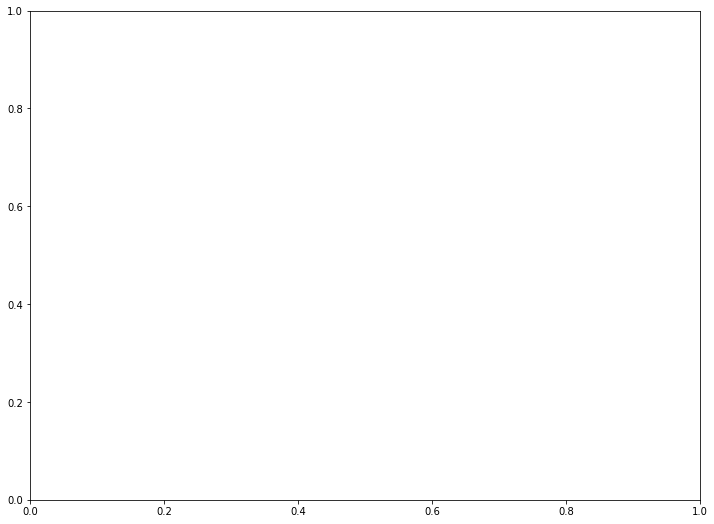

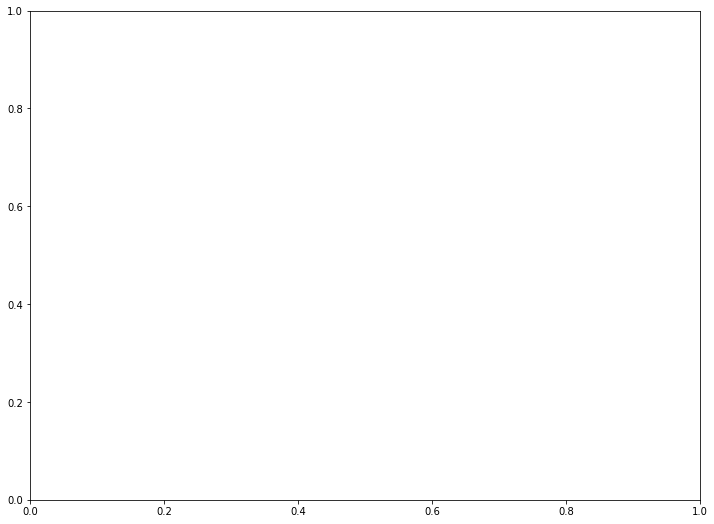

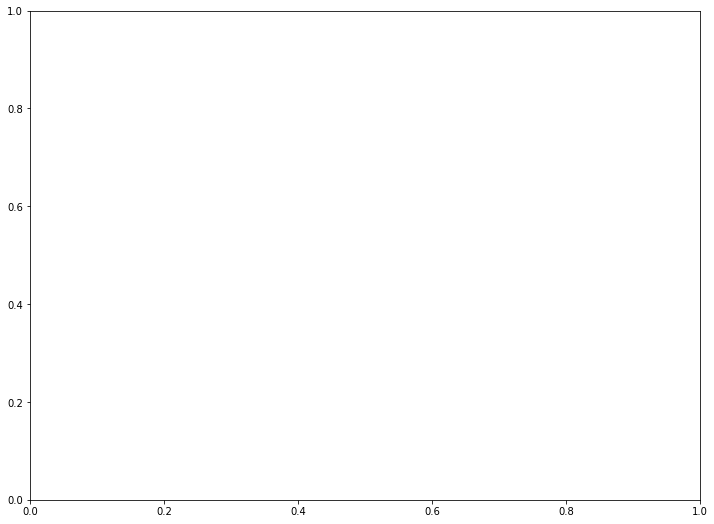

In [11]:
for f in files_sr_20171115:
    name = f[46:63]
    
    try:
        #-- Lendo o arquivo
        sr = pyart.aux_io.read_gamic(f)
        
        #--- Limites do gráfico
        lon_lims, lat_lims = [-49, -46], [-24.5, -22]
   
        #-- Plotando cada nível
        for n in range(0, 4):     
            plota_ppi(sr, n, lon_lims, lat_lims, -23.0294, -47.20541, -23.0294, -47.20541) #- Gerando o gráfico
            plt.savefig("figuras/ppis/sr/sr_elev" + str(n) + "_" + name + ".png", bbox_inches='tight') #- Salvando
            plt.close()
            
    except (ValueError, IndexError):
        pass

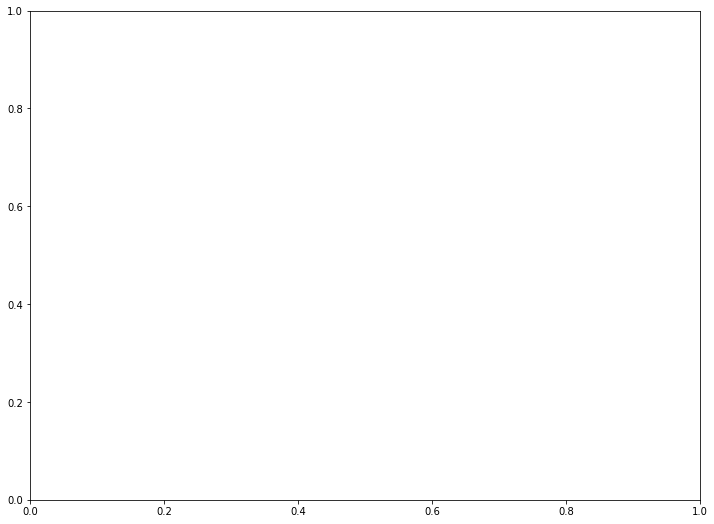

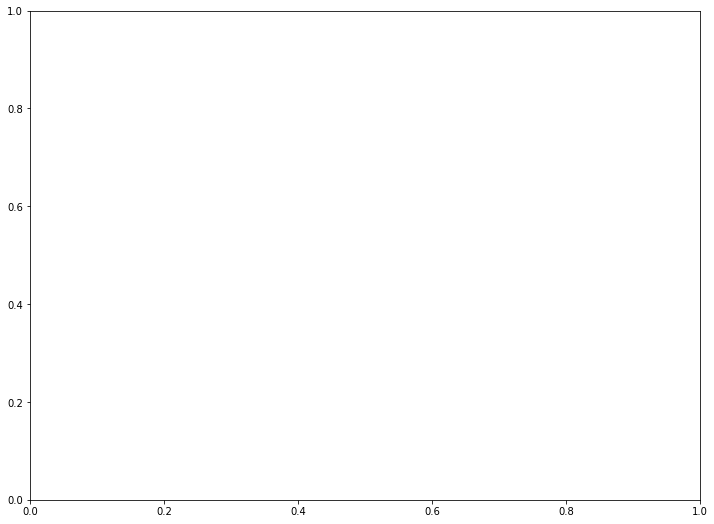

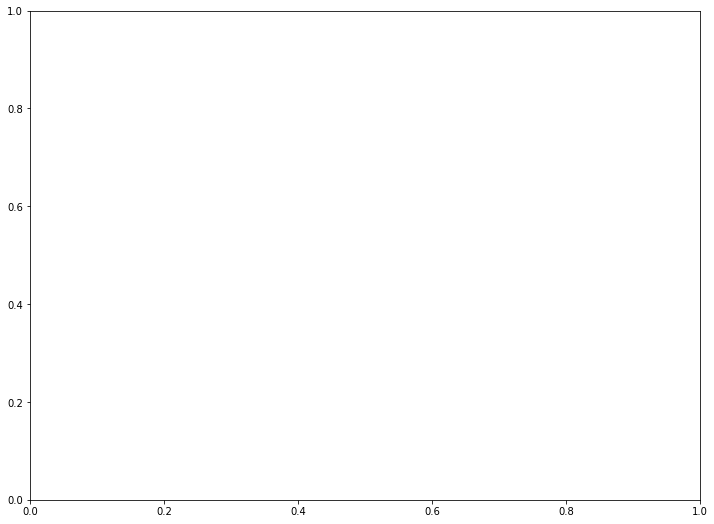

In [12]:
for f in files_sr_20171116:
    name = f[46:63]
    
    try:
        #-- Lendo o arquivo
        sr = pyart.aux_io.read_gamic(f)
        
        #--- Limites do gráfico
        lon_lims, lat_lims = [-49, -46], [-24.5, -22]
   
        #-- Plotando cada nível
        for n in range(0, 4):     
            plota_ppi(sr, n, lon_lims, lat_lims, -22.81405, -47.05641, -22.81405, -47.05641) #- Gerando o gráfico
            plt.savefig("figuras/ppis/sr/sr_elev" + str(n) + "_" + name + ".png", bbox_inches='tight') #- Salvando
            plt.close()
            
    except (ValueError, IndexError):
        pass

#### UNICAMP